# Performance Measures

## Evaluating a classification model

### Model evaluation procedures:
1. Train/test split: Split data into two versions and allow model to be trained and tested on different data.
2. K-fold cross-validation: Create "K" train/test splits and find the average of the results.
3. Confusion Matrix and metrics computation
4. Adjusting the classification threshold
5. ROC (Receiver Operating Characteristic) curve and AUC (Area Under the Curve)

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.preprocessing import binarize
from sklearn.model_selection import cross_val_score

In [2]:
data = pd.read_csv("pima-diabetes.csv")
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


<pre>______________________________________________________________________________________________________</pre>

## 1. Data Preparation

In [3]:
# Assign values to X and y
feature_cols = ['Pregnancies', 'Insulin', 'BMI', 'Age']
X = data[feature_cols]
print(X)
y = data.Outcome
print(y)

     Pregnancies  Insulin   BMI  Age
0              6        0  33.6   50
1              1        0  26.6   31
2              8        0  23.3   32
3              1       94  28.1   21
4              0      168  43.1   33
..           ...      ...   ...  ...
763           10      180  32.9   63
764            2        0  36.8   27
765            5      112  26.2   30
766            1        0  30.1   47
767            1        0  30.4   23

[768 rows x 4 columns]
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [4]:
# Split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [5]:
# Train a logistic regression model on the training set
log_reg = LogisticRegression(solver='liblinear')
log_reg.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [6]:
# Make class predictions for the testing set
y_pred_class = log_reg.predict(X_test)

## 2. Classification accuracy: represent percentage of correct predictions

In [7]:
# Calculate accuracy
print("Classification accuracy:", metrics.accuracy_score(y_test, y_pred_class)*100, "%")

Classification accuracy: 69.27083333333334 %


In [8]:
# Examine the class distribution of the testing set (using a Pandas Series method)
y_test.value_counts()

0    130
1     62
Name: Outcome, dtype: int64

In [9]:
# Calculate the percentage of ones
print("Percentage of ones: ", y_test.mean()*100, "%")

Percentage of ones:  32.29166666666667 %


In [10]:
# Calculate the percentage of zeros
print("Percentage of zeros: ", (1 - y_test.mean())*100, "%")

Percentage of zeros:  67.70833333333333 %


In [11]:
# Calculate null accuracy (for binary classification problems coded as 0/1)
print("Null accuracy for binary classification: ", max(y_test.mean(), 1 - y_test.mean())*100, "%")

Null accuracy for binary classification:  67.70833333333333 %


In [12]:
# Calculate null accuracy (for multi-class classification problems)
print("Null accuracy for multi-class classification: ", y_test.value_counts().head(1) / len(y_test)*100)

Null accuracy for multi-class classification:  0    67.708333
Name: Outcome, dtype: float64


In [13]:
# print the first 25 true and predicted responses
print('True:', y_test.values[0:25])
print('Pred:', y_pred_class[0:25])

True: [1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0]
Pred: [0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]


`Observation: Classification accuracy could be interpreted easily; however, it does not specify the underlying distribution of dependent variables. Moreover, it would not tell what types of errors that the classifier is making.`

<pre>______________________________________________________________________________________________________</pre>

## 3. Confusion Matrix

In [14]:
# IMPORTANT: first argument is true values, second argument is predicted values
print(metrics.confusion_matrix(y_test, y_pred_class))

[[118  12]
 [ 47  15]]


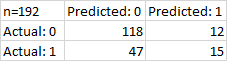

### Basic terminology

True Positives (TP): we correctly predicted that they do have diabetes

True Negatives (TN): we correctly predicted that they don't have diabetes

False Positives (FP): we incorrectly predicted that they do have diabetes (a "Type I error")

False Negatives (FN): we incorrectly predicted that they don't have diabetes (a "Type II error")

In [15]:
confusion = metrics.confusion_matrix(y_test, y_pred_class)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

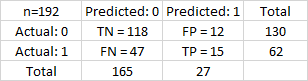

## Metrics Computation

### a. Classification Accuracy: an overall determination of classifier correctness

In [16]:
print((TP + TN) / (TP + TN + FP + FN) * 100, "%")
print(metrics.accuracy_score(y_test, y_pred_class)*100, "%")

69.27083333333334 %
69.27083333333334 %


### b. Classification Error: the frequency of classifier mistakes

In [17]:
print((FP + FN) / (TP + TN + FP + FN)*100, "%")
print((1 - metrics.accuracy_score(y_test, y_pred_class))*100, "%")

30.729166666666668 %
30.729166666666664 %


### c. Sensitivity: True positive rate of prediction (Recall score)

In [18]:
print(TP / (TP + FN)*100, "%")
print(metrics.recall_score(y_test, y_pred_class)*100, "%")

24.193548387096776 %
24.193548387096776 %


### d. Specificity: How specific the classifier in prediction positive instances 

In [19]:
print(TN / (TN + FP)*100, "%")

90.76923076923077 %


### e. False positive rate of prediction

In [20]:
print(FP / (TN + FP)*100, "%")

9.230769230769232 %


### f. Precision: Prediction correctness when a positive value is predicted (Precision score)

In [21]:
print(TP / (TP + FP) * 100, "%")
print(metrics.precision_score(y_test, y_pred_class)*100, "%")

55.55555555555556 %
55.55555555555556 %


`Observation: Confusion matrix is useful to calculate variety of metrics and to handle more than two response classes`

<pre>______________________________________________________________________________________________________</pre>

## 4. Adjusting the classification threshold

In [22]:
# Print the first 10 predicted probabilities for class 1
log_reg.predict_proba(X_test)[0:10, 1]

array([0.36752429, 0.28356344, 0.28895886, 0.4141062 , 0.15896027,
       0.17065156, 0.49889026, 0.51341541, 0.27678612, 0.67189438])

In [23]:
# Store the predicted probabilities for class 1
y_pred_prob = log_reg.predict_proba(X_test)[:, 1]
y_pred_prob

array([0.36752429, 0.28356344, 0.28895886, 0.4141062 , 0.15896027,
       0.17065156, 0.49889026, 0.51341541, 0.27678612, 0.67189438,
       0.35755557, 0.74087965, 0.36050235, 0.23012363, 0.42654231,
       0.19103515, 0.45763601, 0.1190141 , 0.43928953, 0.36961151,
       0.44187989, 0.37611662, 0.19816022, 0.41677304, 0.15548281,
       0.2531671 , 0.09743077, 0.69633712, 0.15358309, 0.2197836 ,
       0.43094832, 0.34216058, 0.22396114, 0.38073543, 0.13342134,
       0.38790216, 0.47049703, 0.16204743, 0.29548176, 0.30918161,
       0.27299705, 0.38816583, 0.27353443, 0.28881041, 0.63471914,
       0.02365251, 0.15820648, 0.23018375, 0.3484593 , 0.27580041,
       0.33264104, 0.24880596, 0.74489512, 0.39001464, 0.41625545,
       0.13575687, 0.18895376, 0.64777682, 0.18922131, 0.05685904,
       0.63991547, 0.46636382, 0.1250972 , 0.26957602, 0.24919104,
       0.30570396, 0.46376224, 0.20963095, 0.42847829, 0.40762264,
       0.20169096, 0.27027066, 0.26255856, 0.57238263, 0.45467

Text(0, 0.5, 'Frequency')

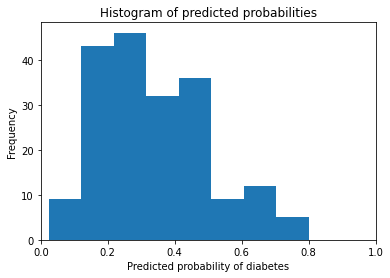

In [24]:
# Histogram of predicted probabilities
plt.hist(y_pred_prob, bins=8)
plt.xlim(0, 1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of diabetes')
plt.ylabel('Frequency')

`Since the threshold for binary classifier is 0.5 by default, the decision of decreasing the threshold for predicting diabetes takes place in order to increase the sensitivity of the classifier.`

In [25]:
# Predict diabetes if the predicted probability is greater than 0.3
y_pred_class = binarize([y_pred_prob], threshold=0.3)[0]
y_pred_class

array([1., 0., 0., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1.,
       0., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1.,
       0., 1., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1.,
       0., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0.,
       1., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 0., 1.,
       1., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 0.,
       1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0.,
       1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1.,
       0., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0.,
       0., 1., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 0., 0.,
       0., 1., 0., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1.,
       0., 0., 0., 0., 0.])

In [26]:
# Print the predicted probabilities
y_pred_prob

array([0.36752429, 0.28356344, 0.28895886, 0.4141062 , 0.15896027,
       0.17065156, 0.49889026, 0.51341541, 0.27678612, 0.67189438,
       0.35755557, 0.74087965, 0.36050235, 0.23012363, 0.42654231,
       0.19103515, 0.45763601, 0.1190141 , 0.43928953, 0.36961151,
       0.44187989, 0.37611662, 0.19816022, 0.41677304, 0.15548281,
       0.2531671 , 0.09743077, 0.69633712, 0.15358309, 0.2197836 ,
       0.43094832, 0.34216058, 0.22396114, 0.38073543, 0.13342134,
       0.38790216, 0.47049703, 0.16204743, 0.29548176, 0.30918161,
       0.27299705, 0.38816583, 0.27353443, 0.28881041, 0.63471914,
       0.02365251, 0.15820648, 0.23018375, 0.3484593 , 0.27580041,
       0.33264104, 0.24880596, 0.74489512, 0.39001464, 0.41625545,
       0.13575687, 0.18895376, 0.64777682, 0.18922131, 0.05685904,
       0.63991547, 0.46636382, 0.1250972 , 0.26957602, 0.24919104,
       0.30570396, 0.46376224, 0.20963095, 0.42847829, 0.40762264,
       0.20169096, 0.27027066, 0.26255856, 0.57238263, 0.45467

### Comparison of confusion matrices

In [27]:
# Previous confusion matrix with threshold of 0.5 (Binary classifier)
print(confusion)

[[118  12]
 [ 47  15]]


In [28]:
# Updated confusion matrix with threshold of 0.3
print(metrics.confusion_matrix(y_test, y_pred_class))

[[80 50]
 [16 46]]


<pre>______________________________________________________________________________________________________</pre>

## 5. ROC (Receiver Operating Characteristic) curve and AUC (Area Under the Curve)

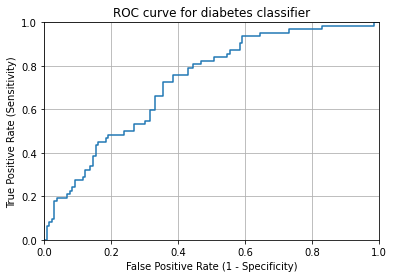

In [29]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [30]:
# Function that accepts a threshold and prints sensitivity and specificity
def evaluate_threshold(threshold):
    print('Sensitivity:', (tpr[thresholds > threshold][-1])*100, "%")
    print('Specificity:', (1 - fpr[thresholds > threshold][-1])*100, "%")

In [31]:
evaluate_threshold(0.5)

Sensitivity: 24.193548387096776 %
Specificity: 90.76923076923077 %


In [32]:
evaluate_threshold(0.3)

Sensitivity: 72.58064516129032 %
Specificity: 61.53846153846154 %


In [33]:
# AUC is the percentage of the ROC plot that is underneath the curve:
print("AUC: ", (metrics.roc_auc_score(y_test, y_pred_prob))*100, "%")

AUC:  72.45657568238212 %


In [34]:
# Calculate cross-validated AUC
print("Cross-validated AUC: ", (cross_val_score(log_reg, X, y, cv=10, scoring='roc_auc').mean())*100, "%")

Cross-validated AUC:  73.78233618233618 %


`Observation: ROC and AUC are the techniques at their best of use that does not require a setup of classification threshold. They are useful even if there is high class imbalance`